# CLASSIFICATION MODEL

In [1]:
#importing libraries
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
#Hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic_df = pandas.read_csv('/home/shreemay/Desktop/ML/titanic_data.csv')

In [4]:
#check the head of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df = titanic_df[['Survived','Pclass','Sex','Name','Age','SibSp','Parch','Ticket','Fare','Embarked']]

In [6]:
titanic_df.head()

,Survived,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C
2,1,3,female,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S
4,0,3,male,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S


In [7]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

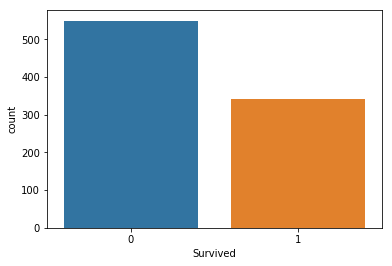

In [8]:
seaborn.countplot(x='Survived',data=titanic_df)


First we will check for any missing value in the dataset

In [9]:
#Check if any feature contains missing value
titanic_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Name        False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked     True
dtype: bool

In [10]:
#Now check the count of null value in each feature
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Name          0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

    Age is a continuous variable.It contains 177 null values.We can replace null values by mean value of non-null values

In [11]:
titanic_df['Age'].fillna((titanic_df['Age'].mean()),inplace=True)

In [12]:
titanic_df.head()

,Survived,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C
2,1,3,female,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S
4,0,3,male,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S


In [13]:
titanic_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Name        False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked     True
dtype: bool

In [14]:
titanic_df.dropna(inplace=True)

In [15]:
titanic_df.head()

,Survived,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C
2,1,3,female,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S
4,0,3,male,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S


In [16]:
titanic_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Name        False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked    False
dtype: bool

In [17]:
#Taking the dependent and independent variables
titanic_df_x = titanic_df[['Pclass','Sex','Name','Age','SibSp','Parch','Ticket','Fare','Embarked']]
titanic_df_y = titanic_df[['Survived']]

In [18]:
#Dividing the data into train and test set.
x_train,x_test,y_train,y_test = train_test_split(titanic_df_x,titanic_df_y,test_size=0.20)

In [19]:
x_train.head()

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
183,2,male,"Becker, Master. Richard F",1.0,2,1,230136,39.0000,S
53,2,female,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",29.0,1,0,2926,26.0000,S
501,3,female,"Canavan, Miss. Mary",21.0,0,0,364846,7.7500,Q
62,1,male,"Harris, Mr. Henry Birkhardt",45.0,1,0,36973,83.4750,S
318,1,female,"Wick, Miss. Mary Natalie",31.0,0,2,36928,164.8667,S


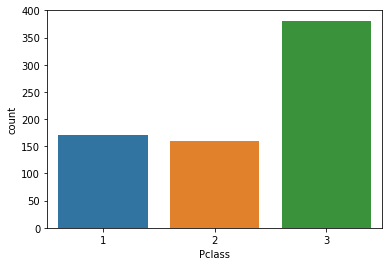

In [20]:
#Checking the count of Pclass
seaborn.countplot(x='Pclass',data=x_train)

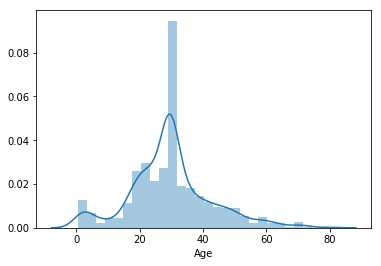

In [21]:
#Check the distribution of age data.
seaborn.distplot(x_train['Age'])

In [22]:
#We are performing z-score normalization
age_scaler = StandardScaler()
age_scaler.fit(pandas.DataFrame(x_train['Age']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
#transforming the column
x_train[['Age']] = age_scaler.transform(x_train[['Age']])

In [24]:
x_train[['Age']].head()

,Age
183,-2.217557
53,-0.047019
501,-0.667172
62,1.193289
318,0.108020


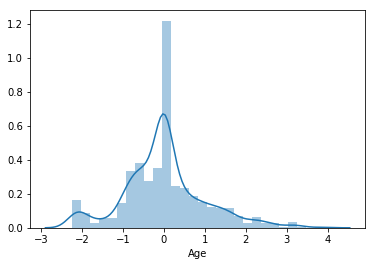

In [25]:
seaborn.distplot(x_train['Age'])

In [26]:
#Performing z-score normalization with frame
fare_scaler = StandardScaler

In [27]:
#Using map function to convert the catogorical to numerical value
x_train['Sex'] = x_train['Sex'].map({'female':0,'male':1})

In [28]:
x_train['Sex'].head()

183    1
53     0
501    0
62     1
318    0
Name: Sex, dtype: int64

In [29]:
embarked_encoder = preprocessing.LabelEncoder()
embarked_encoder.fit(pandas.DataFrame(x_train['Embarked']))

LabelEncoder()

In [30]:
embarked_encoder

LabelEncoder()

In [31]:
x_train[['Embarked']]=embarked_encoder.transform(x_train['Embarked'])

In [32]:
x_train[['Embarked']].head()

,Embarked
183,2
53,2
501,1
62,2
318,2


In [33]:
ticket_encoder = preprocessing.LabelEncoder()
ticket_encoder.fit(pandas.DataFrame(x_train['Ticket']))

LabelEncoder()

In [34]:
x_train[['Ticket']] = ticket_encoder.transform(x_train['Ticket'])

In [35]:
x_train[['Ticket']].head()

,Ticket
183,98
53,208
501,365
62,380
318,376


In [36]:
ticket_scaler = StandardScaler()
ticket_scaler.fit(pandas.DataFrame(x_train['Ticket']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
x_train[['Ticket']] = ticket_scaler.transform(x_train[['Ticket']])

In [38]:
fare_scaler = StandardScaler()
fare_scaler.fit(pandas.DataFrame(x_train['Fare']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:

embarked_scaler = StandardScaler()
embarked_scaler.fit(pandas.DataFrame(x_train['Embarked']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
x_train.head()

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
183,2,1,"Becker, Master. Richard F",-2.217557,2,1,-1.120102,39.0000,2
53,2,0,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",-0.047019,1,0,-0.466020,26.0000,2
501,3,0,"Canavan, Miss. Mary",-0.667172,0,0,0.467533,7.7500,1
62,1,1,"Harris, Mr. Henry Birkhardt",1.193289,1,0,0.556726,83.4750,2
318,1,0,"Wick, Miss. Mary Natalie",0.108020,0,2,0.532942,164.8667,2


In [41]:
name_encoder =  preprocessing.LabelEncoder()
name_encoder.fit(pandas.DataFrame(x_train['Name']))

LabelEncoder()

In [42]:
x_train[['Name']] = name_encoder.transform(x_train['Name'])

In [43]:
x_train.head()

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
183,2,1,64,-2.217557,2,1,-1.120102,39.0000,2
53,2,0,210,-0.047019,1,0,-0.466020,26.0000,2
501,3,0,112,-0.667172,0,0,0.467533,7.7500,1
62,1,1,284,1.193289,1,0,0.556726,83.4750,2
318,1,0,684,0.108020,0,2,0.532942,164.8667,2


In [44]:
name_scaler = StandardScaler()
name_scaler.fit(pandas.DataFrame(x_train['Name']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
x_train[['Name']] = name_scaler.transform(x_train[['Name']]) 
x_train.head()

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
183,2,1,-1.417798,-2.217557,2,1,-1.120102,39.0000,2
53,2,0,-0.706463,-0.047019,1,0,-0.466020,26.0000,2
501,3,0,-1.183935,-0.667172,0,0,0.467533,7.7500,1
62,1,1,-0.345923,1.193289,1,0,0.556726,83.4750,2
318,1,0,1.602940,0.108020,0,2,0.532942,164.8667,2


In [46]:
del x_train['Pclass']

In [47]:
x_train.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
183,1,-1.417798,-2.217557,2,1,-1.120102,39.0000,2
53,0,-0.706463,-0.047019,1,0,-0.466020,26.0000,2
501,0,-1.183935,-0.667172,0,0,0.467533,7.7500,1
62,1,-0.345923,1.193289,1,0,0.556726,83.4750,2
318,0,1.602940,0.108020,0,2,0.532942,164.8667,2


In [48]:
x_train_original = x_train
x_train = x_train.values
y_train = y_train.values

In [49]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
x_test['Sex'] = x_test['Sex'].map({'female':0,'male':1})
#x_test

In [51]:
del x_test['Pclass']

In [52]:
#x_test

In [53]:
name_encoder = preprocessing.LabelEncoder()
name_encoder.fit(pandas.DataFrame(x_test['Name']))

LabelEncoder()

In [54]:
x_test['Name'] = name_encoder.transform(x_test['Name'])

In [55]:
#x_test

In [56]:
name_scaler = StandardScaler()
name_scaler.fit(pandas.DataFrame(x_test['Name']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
x_test[['Name']]=name_scaler.transform(x_test[['Name']])
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
456,1,0.262731,65.0,0,0,13509,26.5500,S
808,1,0.223808,39.0,0,0,248723,13.0000,S
145,1,0.476808,19.0,1,1,C.A. 33112,36.7500,S
528,1,1.021731,39.0,0,0,3101296,7.9250,S
424,1,0.885501,18.0,1,1,370129,20.2125,S


In [58]:
age_scaler = StandardScaler()
age_scaler.fit(pandas.DataFrame(x_test['Age']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
x_test['Age'] = age_scaler.transform(x_test[['Age']])

In [60]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
456,1,0.262731,2.663490,0,0,13509,26.5500,S
808,1,0.223808,0.693856,0,0,248723,13.0000,S
145,1,0.476808,-0.821247,1,1,C.A. 33112,36.7500,S
528,1,1.021731,0.693856,0,0,3101296,7.9250,S
424,1,0.885501,-0.897002,1,1,370129,20.2125,S


In [61]:
ticket_encoder = preprocessing.LabelEncoder()
ticket_encoder.fit(pandas.DataFrame(x_test['Ticket']))

LabelEncoder()

In [62]:
x_test[['Ticket']] = ticket_encoder.transform(x_test['Ticket'])

In [63]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
456,1,0.262731,2.663490,0,0,23,26.5500,S
808,1,0.223808,0.693856,0,0,36,13.0000,S
145,1,0.476808,-0.821247,1,1,138,36.7500,S
528,1,1.021731,0.693856,0,0,60,7.9250,S
424,1,0.885501,-0.897002,1,1,115,20.2125,S


In [64]:
ticket_encoder = StandardScaler()
ticket_encoder.fit(pandas.DataFrame(x_test['Ticket']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
x_test['Ticket'] = ticket_encoder.transform(x_test[['Ticket']])

In [66]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
456,1,0.262731,2.663490,0,0,-1.249672,26.5500,S
808,1,0.223808,0.693856,0,0,-0.978402,13.0000,S
145,1,0.476808,-0.821247,1,1,1.150027,36.7500,S
528,1,1.021731,0.693856,0,0,-0.477595,7.9250,S
424,1,0.885501,-0.897002,1,1,0.670087,20.2125,S


In [67]:
fare_scaler = StandardScaler()
fare_scaler.fit(pandas.DataFrame(x_test['Fare']))                

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
x_test[['Fare']] = fare_scaler.transform(x_test[['Fare']])

In [69]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
456,1,0.262731,2.663490,0,0,-1.249672,-0.100498,S
808,1,0.223808,0.693856,0,0,-0.978402,-0.358376,S
145,1,0.476808,-0.821247,1,1,1.150027,0.093625,S
528,1,1.021731,0.693856,0,0,-0.477595,-0.454962,S
424,1,0.885501,-0.897002,1,1,0.670087,-0.221111,S


In [70]:
embarked_encoder = preprocessing.LabelEncoder()
embarked_encoder.fit(pandas.DataFrame(x_test['Embarked']))

LabelEncoder()

In [71]:
x_test[['Embarked']] = embarked_encoder.transform(x_test['Embarked'])

In [72]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
456,1,0.262731,2.663490,0,0,-1.249672,-0.100498,2
808,1,0.223808,0.693856,0,0,-0.978402,-0.358376,2
145,1,0.476808,-0.821247,1,1,1.150027,0.093625,2
528,1,1.021731,0.693856,0,0,-0.477595,-0.454962,2
424,1,0.885501,-0.897002,1,1,0.670087,-0.221111,2


In [73]:
x_test_original = x_test
x_test = x_test.values
y_test = y_test.values

In [74]:
logistic_regression = LogisticRegression()

In [75]:
logistic_regression.fit(x_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
y_pred = logistic_regression.predict(x_test)

In [77]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [78]:
print(accuracy_score(y_test,y_pred))

0.8146067415730337
